In [67]:
import os
from os import path
import json
import numpy as np
import matplotlib.pyplot as plt
import pprint

pp = pprint.PrettyPrinter(indent=4)
# Turn the interactive mode off otherwise the plots don't carry over across cells
plt.ioff() 

# Set Matplotlib Parameters
# plt.style.use('bmh')
# plt.rc('text', usetex=True)   # Might require installing TeX fonts
plt.rc('axes', facecolor='w', labelcolor='b', edgecolor='k')
plt.rcParams['font.size'] = 16

In [68]:
def initialize_plot():
    fig, ax = plt.subplots(1)
    
    # Get rid of grids and ticks
    ax.grid(False)
#     ax.xaxis.set_ticks_position('none')
#     ax.yaxis.set_ticks_position('none')
    
    # Remove the two sides of the bounding box
    spines_to_remove = ['top', 'right']
    for spine in spines_to_remove:
        ax.spines[spine].set_visible(False)
        
    return fig, ax

In [69]:
def get_model_name(model_dir, seed=10):
    model_name = path.basename(model_dir)
    print(model_name)
    model_name = model_name[len("size_base_epochs_100_patience_5_"):]
    print(model_name)
    model_name = model_name.rstrip(f"all_seed_{seed}")    
    return model_name

In [70]:
plot_dir = "/private/home/shtoshni/research/state-probes/plots"

In [71]:
# model_dir = "/private/home/shtoshni/research/state-probes/models/archive/size_base_epochs_100_patience_5_state_explanation_all_seed_60"
model_dir = "/private/home/shtoshni/research/state-probes/models/size_base_epochs_100_patience_5_state_explanation_all_seed_10"

model_name = get_model_name(model_dir, seed=10)
print(model_name)

size_base_epochs_100_patience_5_state_explanation_all_seed_10
state_explanation_all_seed_10
state_explanation


[0, 1, 5, 2, 9, 5, 9, 0, 8, 5, 24, 3, 2, 1, 1, 0, 16, 10, 3, 4, 2, 9, 3, 3, 8]
[6, 6, 6, 6, 7, 6, 7, 6, 6, 4, 7, 6, 7, 7, 6, 7, 6, 7, 6, 7, 5, 6, 7, 6, 6]
[4, 1, 0, 0, 1, 2, 0, 1, 3, 4, 4, 1, 24, 2, 4, 5, 4, 1, 8, 7, 12, 18, 11, 5, 8]
[6, 5, 6, 7, 6, 7, 6, 7, 6, 6, 6, 5, 5, 6, 7, 6, 7, 7, 7, 7, 7, 5, 7, 6, 6]
[12, 23, 2, 2, 1, 0, 1, 5, 10, 22, 4, 12, 4, 0, 2, 2]
[6, 5, 6, 6, 6, 6, 7, 6, 7, 6, 5, 5, 7, 6, 7, 6]


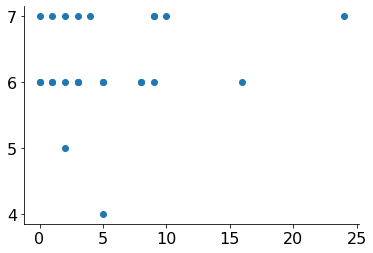

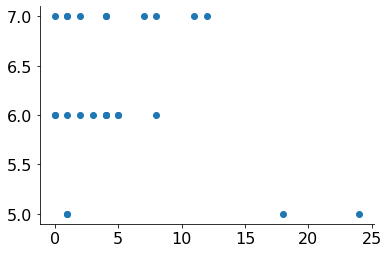

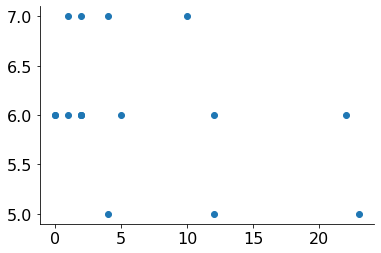

In [72]:
for num_prev_steps in range(1, 4):
    json_file = path.join(model_dir, f"cloze_mrr_fine_{num_prev_steps}.jsonl")
    rank_data = []
    state_data = []
    with open(json_file) as f:
        for line in f:
            instance = json.loads(line.strip())
            rank_data.append(int(instance["rank"]))
            state_data.append(int(instance["corr_state"]))
            
    print(rank_data)
    print(state_data)
    
    fig, ax = initialize_plot()
    plt.scatter(rank_data, state_data)
#     plt.ylim((2, 7.7))
    
    figure_file = path.join(plot_dir, f"{model_name}_prev_actions_{num_prev_steps}.jpg")
    plt.savefig(figure_file, format='jpg', dpi=300)